In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans as km

In [16]:
def confusionM(y_true,y_predict,target_names):
#function for visualisation
    cMatrix = confusion_matrix(y_true,y_predict)
    df_cm = pd.DataFrame(cMatrix,index=target_names,columns=target_names)
    plt.figure(figsize = (6,4))
    cm = sns.heatmap(df_cm,annot=True,fmt="d")
    cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(),rotation=90)
    cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(),rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def convertCluster2Label(cluster_labels,original_labels,labels2convert):
    #both input arguments have the same dimensionality, the original labels are the labels in training set
    #cluster_labels are labels of clusters after clustering process
    #labels2convert are the predicted labels based on the clustering model
    #we need to convert them into the settings to comply with the original labels' definition
    converted_labels =np.full(labels2convert.size, -1)
    #converted_labels =np.full(labels2convert.size, np.nan) will generate float
    for i in np.unique(cluster_labels):
        temp_original_labels = original_labels[cluster_labels==i]
        temp_label = np.bincount(temp_original_labels).argmax()
        converted_labels[labels2convert==i] = temp_label
    return converted_labels

c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 1 0 1 0 2 2 1 1 2 1 2 1 1 2 1 1 1 2 2 0 0 2 2 0 2 2 0 2 2 2 1 2 1 1 2
 0]
[1 1 0 2 0 2 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 2 2 1 1 2 1 1 2 1 1 1 0 1 0 0 1
 2]


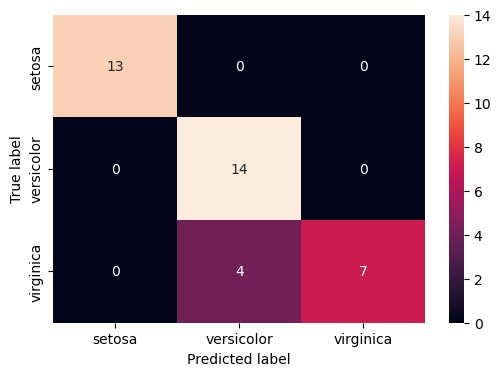

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X_train, X_test, y_train, y_true = train_test_split(X, y)
kmeans = km(n_clusters=3, n_init=2020)
#change the number of clusters according to your application
kmeans.fit(X_train)
values = kmeans.cluster_centers_.squeeze()
trained_labels = kmeans.labels_
#labels' definitions are different from the Y_train, you have to convert them into the same
labels_predict = kmeans.predict(X_test)
print(labels_predict)
#labels_predict' definitions are different from the Y_test too, you have to convert them into the same
y_predict = convertCluster2Label(trained_labels,y_train,labels_predict)
print(y_predict)

confusionM(y_true,y_predict,target_names)